# Time Series Analysis for Q4
Tutorial: https://colab.research.google.com/drive/1h7okvRLHCbIGocdHy_jfLdgPN2vOi9CV?usp=sharing

In [143]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Wind

In [144]:
df_wind = pd.read_csv("ninja-wind-country-IE-current_total-merra2.csv", comment='#', header=None)
df_wind.head()

/tmp/ipykernel_8514/3030181279.py:1: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_wind = pd.read_csv("ninja-wind-country-IE-current_total-merra2.csv", comment='#', header=None)


,0,1,2,3,4
0,"# Renewables.ninja Wind (current total fleet, ...",NaN,NaN,NaN,NaN
1,# Units: time in UTC; other columns are capaci...,NaN,NaN,NaN,NaN
2,"# {'units': {'time': 'UTC', 'NATIONAL': 'bias-...",NaN,NaN,NaN,NaN
3,time,NATIONAL,IE04,IE05,IE06
4,1980-01-01 00:00:00+00:00,0.145697,0.056425,0.224918,0.042835


In [145]:
# print som emeta data from the csv file

#for i in range(3):
#    print(df_wind.iloc[i, 0])
#    print("\n")

In [146]:
w_capacity = 4000 # used to go from normalized values to absolute values

df_wind = df_wind.iloc[4:, :]
df_wind.head()
col = ['time wind', 'power wind', 'IE04', 'IE05', 'IE06']
df_wind.columns = col
df_wind.tail()

,time wind,power wind,IE04,IE05,IE06
394487,2024-12-31 19:00:00+00:00,0.566249,0.684685,0.468164,0.649192
394488,2024-12-31 20:00:00+00:00,0.506534,0.665317,0.374993,0.618031
394489,2024-12-31 21:00:00+00:00,0.476798,0.64879,0.33732,0.574653
394490,2024-12-31 22:00:00+00:00,0.460486,0.642585,0.315573,0.542981
394491,2024-12-31 23:00:00+00:00,0.424961,0.620224,0.273166,0.486031


In [147]:
# Get 2024 data alone
df_wind24 = df_wind.iloc[-(366*24):, 0:2]
df_wind24['power wind'] = df_wind24['power wind'].astype('float') * w_capacity
df_wind24.head()

,time wind,power wind
385708,2024-01-01 00:00:00+00:00,2226.376
385709,2024-01-01 01:00:00+00:00,2028.340
385710,2024-01-01 02:00:00+00:00,1802.656
385711,2024-01-01 03:00:00+00:00,1587.272
385712,2024-01-01 04:00:00+00:00,1434.276


In [148]:
wind_recordings = np.array(df_wind24['power wind'].astype('float').tolist())

print(max(wind_recordings))
print(min(wind_recordings))
print(np.mean(wind_recordings))
print(len(wind_recordings))

3924.044
8.092
1198.830454007286
8784


In [149]:
a = 3*24 #moving average window size
N = len(wind_recordings)
mvavg_wind24 = np.zeros(len(wind_recordings))
for i in range(a, N):
    mvavg_wind24[i] = sum(wind_recordings[i-a: i]) / a

print(max(mvavg_wind24[a:]))
print(min(mvavg_wind24[a:]))
print(np.mean(mvavg_wind24[a:]))

3282.7031666666658
129.67355555555557
1191.3151969952046


Maximum recorded wind power 3924.044 0.981011
Minimum recorded wind power: 8.092 0.002023
Mean wind power: 1198.830454007286 0.2997076135018215

Maximum moving average wind power: 3282.7031666666658 0.8206757916666665
Minimum moving average wind power: 129.67355555555557 0.03241838888888889
Mean moving average wind power: 1191.3151969952046 0.2978287992488011


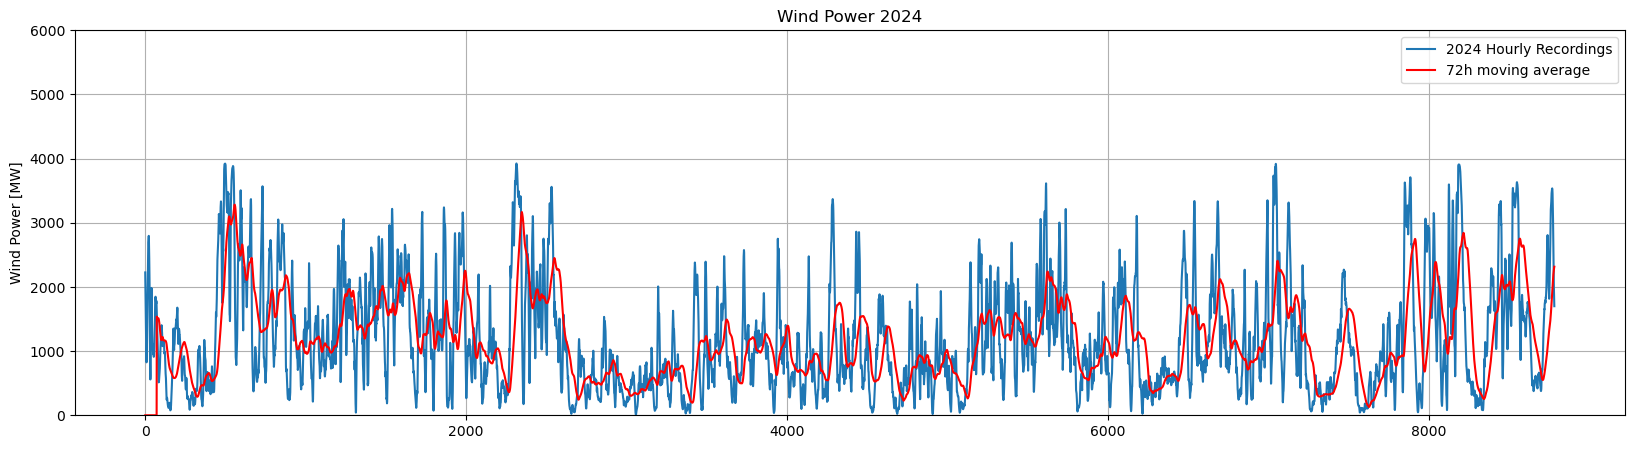

In [150]:
plt.figure(figsize=(20, 5))
plt.title('Wind Power 2024')
plt.plot(wind_recordings)
plt.plot(mvavg_wind24, color='red')
plt.legend(['2024 Hourly Recordings', '72h moving average'])
plt.grid(True)
plt.ylabel('Wind Power [MW]')
plt.ylim([0, 6000])
plt.savefig("wind-power.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')

print("Maximum recorded wind power", max(wind_recordings), max(wind_recordings) / w_capacity)
print("Minimum recorded wind power:", min(wind_recordings), min(wind_recordings) / w_capacity )
print("Mean wind power:", np.mean(wind_recordings), np.mean(wind_recordings) / w_capacity )

print("\nMaximum moving average wind power:", max(mvavg_wind24[a:]), max(mvavg_wind24[a:]) / w_capacity)
print("Minimum moving average wind power:", min(mvavg_wind24[a:]), min(mvavg_wind24[a:]) / w_capacity )
print("Mean moving average wind power:", np.mean(mvavg_wind24[a:]),np.mean(mvavg_wind24[a:]) / w_capacity)


# Solar

In [151]:
df_pv = pd.read_csv("ninja-pv-country-ES-national-merra2.csv", comment='#', header=None)
df_pv.head()

/tmp/ipykernel_8514/3181467354.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pv = pd.read_csv("ninja-pv-country-ES-national-merra2.csv", comment='#', header=None)


,0,1
0,"# Renewables.ninja pv (country zones, hourly, ...",NaN
1,"# Units: time in UTC, other columns are bias-c...",NaN
2,"# {'units': {'time': 'UTC', 'NATIONAL': 'bias-...",NaN
3,time,NATIONAL
4,1980-01-01 00:00:00+00:00,0.000000


In [152]:
for i in range(3):
    print(df_pv.iloc[i, 0])
    print("\n")

# Renewables.ninja pv (country zones, hourly, 1980 - 2024) - ES - ninja-pv-countryzones-ES-hourly-merra2.csv.gz - Version: 1.4 - License: https://creativecommons.org/licenses/by-nc/4.0/ - Reference: https://doi.org/10.1016/j.energy.2016.08.060


# Units: time in UTC, other columns are bias-corrected capacity factors [0-1].


# {'units': {'time': 'UTC', 'NATIONAL': 'bias-corrected capacity factor [0-1]'}, 'country': 'ES', 'filename': 'ninja-pv-countryzones-ES-hourly-merra2.csv.gz', 'version': '1.4', 'license': 'https://creativecommons.org/licenses/by-nc/4.0/', 'reference': 'https://doi.org/10.1016/j.energy.2016.08.060'}




In [153]:
pv_capacity = 2000
pv_header = ['time pv', 'power pv']
df_pv.columns = pv_header
df_pv = df_pv.iloc[-366*24:, :]
df_pv['power pv'] = df_pv['power pv'] * pv_capacity
df_pv.head()

,time pv,power pv
385708,2024-01-01 00:00:00+00:00,0.0
385709,2024-01-01 01:00:00+00:00,0.0
385710,2024-01-01 02:00:00+00:00,0.0
385711,2024-01-01 03:00:00+00:00,0.0
385712,2024-01-01 04:00:00+00:00,0.0


Maximum recorded pv power 1486.0 0.743
Mean Hourly pv power 333.1700819672131 0.16658504098360655
Minimum recorded pv power: 0.0 0.0
Maximum 72h moving average pv power 492.72222222222223 0.24636111111111111
Mean 72h moving average pv power 334.18185644322006 0.16709092822161004
Minimum 72h moving average pv power 105.13888888888889 0.05256944444444444


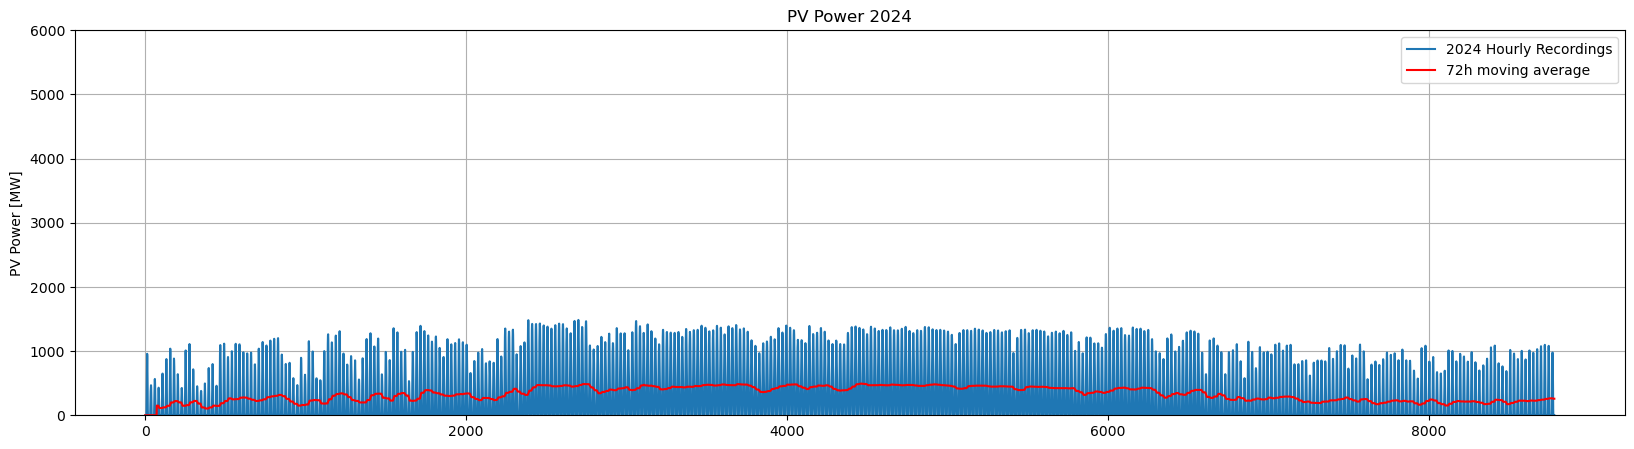

In [154]:
pv_power = np.array(df_pv['power pv'].astype('float').tolist())
mvavg_pv = np.zeros(len(pv_power))
for i in range(a, len(pv_power)):
    mvavg_pv[i] = sum(pv_power[i-a: i]) / a

plt.figure(figsize=(20, 5))
plt.plot(pv_power)
plt.plot(mvavg_pv, color='red')
plt.legend(['2024 Hourly Recordings', '72h moving average'])
plt.title('PV Power 2024')
plt.ylabel('PV Power [MW]')
plt.ylim([0, 6000])
plt.grid(True)
plt.savefig("pv-power.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')

print("Maximum recorded pv power", max(pv_power), max(pv_power) / pv_capacity)
print("Mean Hourly pv power", np.mean(pv_power), np.mean(pv_power) / pv_capacity)
print("Minimum recorded pv power:", min(pv_power), min(pv_power) / pv_capacity)

print("Maximum 72h moving average pv power", max(mvavg_pv[a:]), max(mvavg_pv[a:]) / pv_capacity)
print("Mean 72h moving average pv power", np.mean(mvavg_pv[a:]), np.mean(mvavg_pv[a:]) / pv_capacity)
print("Minimum 72h moving average pv power", min(mvavg_pv[a:]), min(mvavg_pv[a:]) / pv_capacity)

# Demand

In [155]:
df_demand = pd.read_csv("GUI_TOTAL_LOAD_DAYAHEAD_202312312300-202412312300.csv")
df_demand.columns = ['time demand', 'Area', 'demand', 'day-ahead']

Remove half-hourly recordings

In [156]:
df_demand['time demand'] = df_demand['time demand'].str.slice(stop=16)
df_demand['time demand'] = pd.to_datetime(df_demand['time demand'], format='%d/%m/%Y %H:%M')

# Remove any half hourly time stamps
idx_minute = []

for i in range(len(df_demand)):
    if df_demand['time demand'][i].minute == 0:
        idx_minute.append(i)

df_demand = df_demand.iloc[idx_minute]

df_demand.index = np.arange(len(df_demand))
df_demand.tail()

,time demand,Area,demand,day-ahead
8779,2024-12-31 19:00:00,Ireland (IE),4635.74,5120.0
8780,2024-12-31 20:00:00,Ireland (IE),4406.22,4969.0
8781,2024-12-31 21:00:00,Ireland (IE),4131.93,4772.0
8782,2024-12-31 22:00:00,Ireland (IE),3874.34,4530.0
8783,2024-12-31 23:00:00,Ireland (IE),3706.46,4233.0


Remove NaN values

In [157]:
df_demand = df_demand[np.logical_not(np.isnan(df_demand['demand']))]

Normalize to 4000 MW mean

In [158]:
scaling = 4000 / np.mean(df_demand['demand'].astype('float'))
df_demand['demand'] = df_demand['demand'] * scaling
np.mean(df_demand['demand'])

4000.0

Moving average

In [159]:
mvavg_demand = np.zeros(len(df_demand))
a = 24

# There are some nan values in this dataset, I had to account for that when calculating the average
for i in range(a, len(mvavg_demand)):
    x = sum(np.isnan(df_demand['demand'][i-a:i]))
    mvavg_demand[i] = np.nansum(df_demand['demand'][i-a:i]) / (a - x)
mvavg_demand[0:a] = mvavg_demand[a]

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(df_demand['demand'])
plt.plot(mvavg_demand, color='red')
plt.ylabel('Demand (MW)')
plt.grid(True)
plt.title('Demand')
plt.legend(['2024 Hourly Recordings', '24h Moving Average'])
plt.ylim([0, 6000])
plt.savefig("demand.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')

In [186]:
datemax = np.argmax(df_demand['demand'])
df_demand.iloc[datemax]

time demand    2024-11-27 19:00:00
Area                  Ireland (IE)
demand                 5924.442215
day-ahead                   5552.0
Name: 7896, dtype: object

In [185]:
datemin = np.argmin(df_demand['demand'])
df_demand.iloc[datemin]

time demand    2024-08-06 05:00:00
Area                  Ireland (IE)
demand                  2781.79771
day-ahead                   3190.0
Name: 5174, dtype: object

In [161]:
print("Maximum demand", max(df_demand['demand']), max(df_demand['demand']) / 6000)
print("Mean demand", np.nansum(df_demand['demand']) / len(df_demand['demand']), np.nansum(df_demand['demand']) / len(df_demand['demand']) / 6000)
print("Minimum demand", min(df_demand['demand']), min(df_demand['demand']) / 6000)

print("\nMaximum 24h Moving average demand", max(mvavg_demand[a:]), max(mvavg_demand[a:]) / 6000)
print("Mean 24h Moving average demand", np.nansum(mvavg_demand[a:]) / len(mvavg_demand[a:]), np.nansum(mvavg_demand[a:]) / len(mvavg_demand[a:]) / 6000)
print("Minimum 24h Moving Average Demand", min(mvavg_demand[a:]), min(mvavg_demand[a:]) / 6000)

Maximum demand 5924.4422147352325 0.9874070357892054
Mean demand 4000.0 0.6666666666666666
Minimum demand 2781.7977097314106 0.46363295162190177

Maximum 24h Moving average demand 4898.686261261763 0.8164477102102939
Mean 24h Moving average demand 4000.2840267394977 0.6667140044565829
Minimum 24h Moving Average Demand 3271.8367609812994 0.5453061268302166


# Residual demand
Demand after the production from wind and solar has been subtracted

In [162]:
df_demand

,time demand,Area,demand,day-ahead
0,2024-01-01 00:00:00,Ireland (IE),3657.163830,3678.0
1,2024-01-01 01:00:00,Ireland (IE),3614.412590,3828.0
2,2024-01-01 02:00:00,Ireland (IE),3482.773874,3769.0
3,2024-01-01 03:00:00,Ireland (IE),3323.689530,3661.0
4,2024-01-01 04:00:00,Ireland (IE),3217.500965,3579.0
...,...,...,...,...
8779,2024-12-31 19:00:00,Ireland (IE),4843.197321,5120.0
8780,2024-12-31 20:00:00,Ireland (IE),4603.405907,4969.0
8781,2024-12-31 21:00:00,Ireland (IE),4316.840959,4772.0
8782,2024-12-31 22:00:00,Ireland (IE),4047.723364,4530.0


In [163]:
df_pv = df_pv.iloc[df_demand.index]
df_pv

,time pv,power pv
385708,2024-01-01 00:00:00+00:00,0.0
385709,2024-01-01 01:00:00+00:00,0.0
385710,2024-01-01 02:00:00+00:00,0.0
385711,2024-01-01 03:00:00+00:00,0.0
385712,2024-01-01 04:00:00+00:00,0.0
...,...,...
394487,2024-12-31 19:00:00+00:00,0.0
394488,2024-12-31 20:00:00+00:00,0.0
394489,2024-12-31 21:00:00+00:00,0.0
394490,2024-12-31 22:00:00+00:00,0.0


In [164]:
df_pv.columns = ['time pv', 'pv power']
df_pv['time pv'] = df_pv['time pv'].str.slice(stop=16)

In [165]:
df_pv['time pv'] = pd.to_datetime(df_pv['time pv'], format='%Y-%m-%d %H:%M')
df_pv

,time pv,pv power
385708,2024-01-01 00:00:00,0.0
385709,2024-01-01 01:00:00,0.0
385710,2024-01-01 02:00:00,0.0
385711,2024-01-01 03:00:00,0.0
385712,2024-01-01 04:00:00,0.0
...,...,...
394487,2024-12-31 19:00:00,0.0
394488,2024-12-31 20:00:00,0.0
394489,2024-12-31 21:00:00,0.0
394490,2024-12-31 22:00:00,0.0


In [166]:
df_wind24 = df_wind24.iloc[df_demand.index]
df_wind24.columns = ['time wind', 'wind power']
df_wind24['time wind'] = df_wind24['time wind'].str.slice(stop=16)
df_wind24['time wind'] = pd.to_datetime(df_wind24['time wind'], format='%Y-%m-%d %H:%M')
df_wind24

,time wind,wind power
385708,2024-01-01 00:00:00,2226.376
385709,2024-01-01 01:00:00,2028.340
385710,2024-01-01 02:00:00,1802.656
385711,2024-01-01 03:00:00,1587.272
385712,2024-01-01 04:00:00,1434.276
...,...,...
394487,2024-12-31 19:00:00,2264.996
394488,2024-12-31 20:00:00,2026.136
394489,2024-12-31 21:00:00,1907.192
394490,2024-12-31 22:00:00,1841.944


In [167]:
# make a mf df

# First, reset to common index

idx = np.arange(len(df_demand))
df_demand.index = idx
df_wind24.index = idx
df_pv.index = idx

DF = pd.concat([df_demand, df_wind24, df_pv], axis=1)
DF

,time demand,Area,demand,day-ahead,time wind,wind power,time pv,pv power
0,2024-01-01 00:00:00,Ireland (IE),3657.163830,3678.0,2024-01-01 00:00:00,2226.376,2024-01-01 00:00:00,0.0
1,2024-01-01 01:00:00,Ireland (IE),3614.412590,3828.0,2024-01-01 01:00:00,2028.340,2024-01-01 01:00:00,0.0
2,2024-01-01 02:00:00,Ireland (IE),3482.773874,3769.0,2024-01-01 02:00:00,1802.656,2024-01-01 02:00:00,0.0
3,2024-01-01 03:00:00,Ireland (IE),3323.689530,3661.0,2024-01-01 03:00:00,1587.272,2024-01-01 03:00:00,0.0
4,2024-01-01 04:00:00,Ireland (IE),3217.500965,3579.0,2024-01-01 04:00:00,1434.276,2024-01-01 04:00:00,0.0
...,...,...,...,...,...,...,...,...
8712,2024-12-31 19:00:00,Ireland (IE),4843.197321,5120.0,2024-12-31 19:00:00,2264.996,2024-12-31 19:00:00,0.0
8713,2024-12-31 20:00:00,Ireland (IE),4603.405907,4969.0,2024-12-31 20:00:00,2026.136,2024-12-31 20:00:00,0.0
8714,2024-12-31 21:00:00,Ireland (IE),4316.840959,4772.0,2024-12-31 21:00:00,1907.192,2024-12-31 21:00:00,0.0
8715,2024-12-31 22:00:00,Ireland (IE),4047.723364,4530.0,2024-12-31 22:00:00,1841.944,2024-12-31 22:00:00,0.0


In [168]:
# Find the indexes that has NaN values, remove them
DF = DF[pd.isna(DF['demand']) == False]
DF

,time demand,Area,demand,day-ahead,time wind,wind power,time pv,pv power
0,2024-01-01 00:00:00,Ireland (IE),3657.163830,3678.0,2024-01-01 00:00:00,2226.376,2024-01-01 00:00:00,0.0
1,2024-01-01 01:00:00,Ireland (IE),3614.412590,3828.0,2024-01-01 01:00:00,2028.340,2024-01-01 01:00:00,0.0
2,2024-01-01 02:00:00,Ireland (IE),3482.773874,3769.0,2024-01-01 02:00:00,1802.656,2024-01-01 02:00:00,0.0
3,2024-01-01 03:00:00,Ireland (IE),3323.689530,3661.0,2024-01-01 03:00:00,1587.272,2024-01-01 03:00:00,0.0
4,2024-01-01 04:00:00,Ireland (IE),3217.500965,3579.0,2024-01-01 04:00:00,1434.276,2024-01-01 04:00:00,0.0
...,...,...,...,...,...,...,...,...
8712,2024-12-31 19:00:00,Ireland (IE),4843.197321,5120.0,2024-12-31 19:00:00,2264.996,2024-12-31 19:00:00,0.0
8713,2024-12-31 20:00:00,Ireland (IE),4603.405907,4969.0,2024-12-31 20:00:00,2026.136,2024-12-31 20:00:00,0.0
8714,2024-12-31 21:00:00,Ireland (IE),4316.840959,4772.0,2024-12-31 21:00:00,1907.192,2024-12-31 21:00:00,0.0
8715,2024-12-31 22:00:00,Ireland (IE),4047.723364,4530.0,2024-12-31 22:00:00,1841.944,2024-12-31 22:00:00,0.0


In [169]:
DF['residual'] = DF['demand'] - DF['wind power'] - DF['pv power']
DF

,time demand,Area,demand,day-ahead,time wind,wind power,time pv,pv power,residual
0,2024-01-01 00:00:00,Ireland (IE),3657.163830,3678.0,2024-01-01 00:00:00,2226.376,2024-01-01 00:00:00,0.0,1430.78783
1,2024-01-01 01:00:00,Ireland (IE),3614.412590,3828.0,2024-01-01 01:00:00,2028.340,2024-01-01 01:00:00,0.0,1586.07259
2,2024-01-01 02:00:00,Ireland (IE),3482.773874,3769.0,2024-01-01 02:00:00,1802.656,2024-01-01 02:00:00,0.0,1680.117874
3,2024-01-01 03:00:00,Ireland (IE),3323.689530,3661.0,2024-01-01 03:00:00,1587.272,2024-01-01 03:00:00,0.0,1736.41753
4,2024-01-01 04:00:00,Ireland (IE),3217.500965,3579.0,2024-01-01 04:00:00,1434.276,2024-01-01 04:00:00,0.0,1783.224965
...,...,...,...,...,...,...,...,...,...
8712,2024-12-31 19:00:00,Ireland (IE),4843.197321,5120.0,2024-12-31 19:00:00,2264.996,2024-12-31 19:00:00,0.0,2578.201321
8713,2024-12-31 20:00:00,Ireland (IE),4603.405907,4969.0,2024-12-31 20:00:00,2026.136,2024-12-31 20:00:00,0.0,2577.269907
8714,2024-12-31 21:00:00,Ireland (IE),4316.840959,4772.0,2024-12-31 21:00:00,1907.192,2024-12-31 21:00:00,0.0,2409.648959
8715,2024-12-31 22:00:00,Ireland (IE),4047.723364,4530.0,2024-12-31 22:00:00,1841.944,2024-12-31 22:00:00,0.0,2205.779364


In [170]:
a = 72
N = len(DF)
mvavg_residual = np.zeros(N)
for i in range(a, N):
    mvavg_residual[i] = sum(DF['residual'][i-a:i]) / a

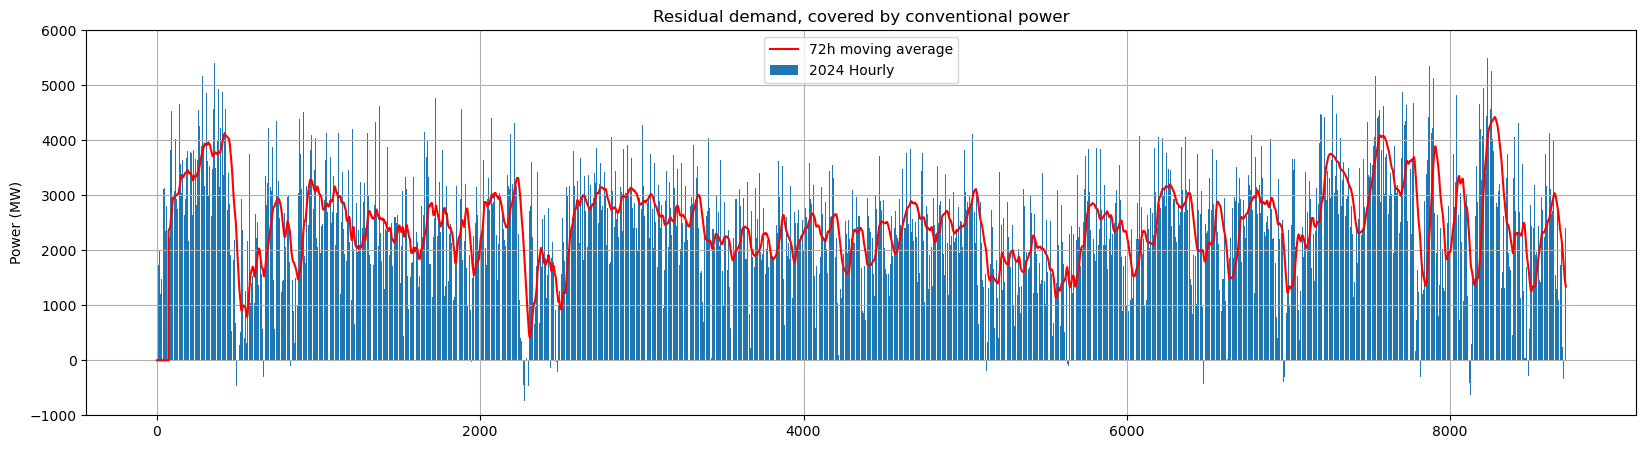

In [171]:
plt.figure(figsize=(20, 5))
plt.bar(DF.index, DF['residual'])
plt.plot(DF.index, mvavg_residual, color='red')
plt.grid(True)
plt.title("Residual demand, covered by conventional power")
plt.ylabel("Power (MW)")
plt.legend(['72h moving average', '2024 Hourly'])
plt.ylim([-1000, 6000])
plt.savefig("residual-demand.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')

In [172]:
print("Maximum residual:", max(DF['residual']), max(DF['residual']) / 6000)
print("Mean residual:", np.mean(DF['residual']), np.mean(DF['residual']) / 6000)
print("Minimum residual:", min(DF['residual']), min(DF['residual']) / 6000)

Maximum residual: 5618.675845674367 0.9364459742790612
Mean residual: 2468.9103388780686 0.4114850564796781
Minimum residual: -974.9596403787364 -0.16249327339645606


In [173]:
DF['residual'][DF['residual'] < 0]

489    -110.193986
490     -485.02017
491    -566.634157
492    -469.145177
493      -187.0089
           ...    
8701   -343.190987
8702   -456.020559
8703     -467.3913
8704   -323.410964
8705    -99.846965
Name: residual, Length: 171, dtype: object

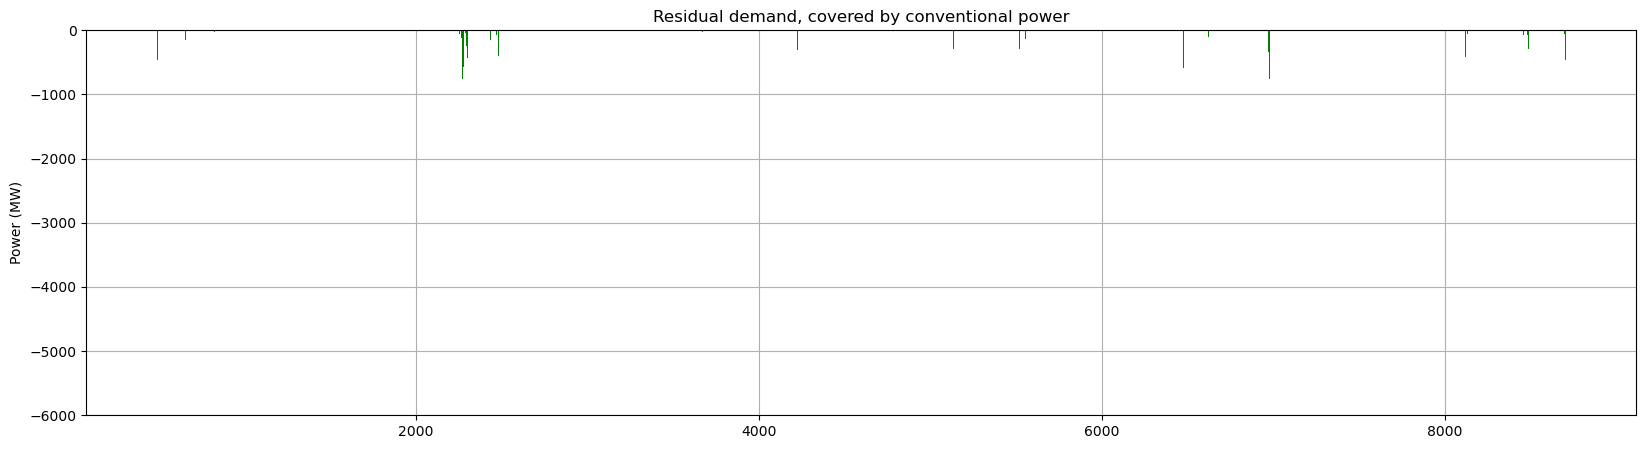

In [174]:
plt.figure(figsize=(20, 5))
plt.bar(DF['residual'][DF['residual'] < 0].index, DF['residual'][DF['residual'] < 0], color='green', )
plt.grid(True)
plt.title("Residual demand, covered by conventional power")
plt.ylabel("Power (MW)")
plt.ylim([-6000, 0])
plt.savefig("residual-demand-negative.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')

### Maximum hour-to-hour change in residual demand
This is a bitch.

First, clean up the data, such that the analysis is carried out only on datapoints which has a previous datapoint one hour apart. All the NaNs have f'ed this up.

In [177]:
rc_idx = []
residual_change = []
# Check if diff is one hour
for i in range(1, len(DF)):
    if (DF['time demand'].iloc[i] - DF['time demand'].iloc[i - 1]) == pd.Timedelta(hours=1):
        rc_idx.append(DF.index[i])
        rc = DF['residual'].iloc[i] - DF['residual'].iloc[i-1]
        residual_change.append(rc)

In [178]:
DF.loc[rc_idx, 'residual change'] = np.array(residual_change)

In [179]:
maxidx = np.nanargmax(DF['residual change'])
maxidx

8389

In [ ]:
np.nanmax(DF['residual change'])

In [187]:
DF

,time demand,Area,demand,day-ahead,time wind,wind power,time pv,pv power,residual,residual change
0,2024-01-01 00:00:00,Ireland (IE),3657.163830,3678.0,2024-01-01 00:00:00,2226.376,2024-01-01 00:00:00,0.0,1430.78783,NaN
1,2024-01-01 01:00:00,Ireland (IE),3614.412590,3828.0,2024-01-01 01:00:00,2028.340,2024-01-01 01:00:00,0.0,1586.07259,155.284760
2,2024-01-01 02:00:00,Ireland (IE),3482.773874,3769.0,2024-01-01 02:00:00,1802.656,2024-01-01 02:00:00,0.0,1680.117874,94.045284
3,2024-01-01 03:00:00,Ireland (IE),3323.689530,3661.0,2024-01-01 03:00:00,1587.272,2024-01-01 03:00:00,0.0,1736.41753,56.299656
4,2024-01-01 04:00:00,Ireland (IE),3217.500965,3579.0,2024-01-01 04:00:00,1434.276,2024-01-01 04:00:00,0.0,1783.224965,46.807436
...,...,...,...,...,...,...,...,...,...,...
8712,2024-12-31 19:00:00,Ireland (IE),4843.197321,5120.0,2024-12-31 19:00:00,2264.996,2024-12-31 19:00:00,0.0,2578.201321,159.976001
8713,2024-12-31 20:00:00,Ireland (IE),4603.405907,4969.0,2024-12-31 20:00:00,2026.136,2024-12-31 20:00:00,0.0,2577.269907,-0.931414
8714,2024-12-31 21:00:00,Ireland (IE),4316.840959,4772.0,2024-12-31 21:00:00,1907.192,2024-12-31 21:00:00,0.0,2409.648959,-167.620948
8715,2024-12-31 22:00:00,Ireland (IE),4047.723364,4530.0,2024-12-31 22:00:00,1841.944,2024-12-31 22:00:00,0.0,2205.779364,-203.869595


In [188]:
DF.iloc[maxidx-1:maxidx+1,[0, 2, 5, 7, 8, 9]]

,time demand,demand,wind power,pv power,residual,residual change
8388,2024-12-18 07:00:00,3594.593650,2372.592,4.0,1218.00165,562.976733
8389,2024-12-18 08:00:00,4168.726508,1854.920,164.0,2149.806508,931.804858


In [182]:
print("Maximum change:", np.nanmax(abs(DF['residual change'])))
print("Maximum upwards change:", np.nanmax(DF['residual change']))
print("Maximum downwards change:", np.nanmin(DF['residual change']))

Maximum change: 1155.2489513333226
Maximum upwards change: 931.8048581429712
Maximum downwards change: -1155.2489513333226


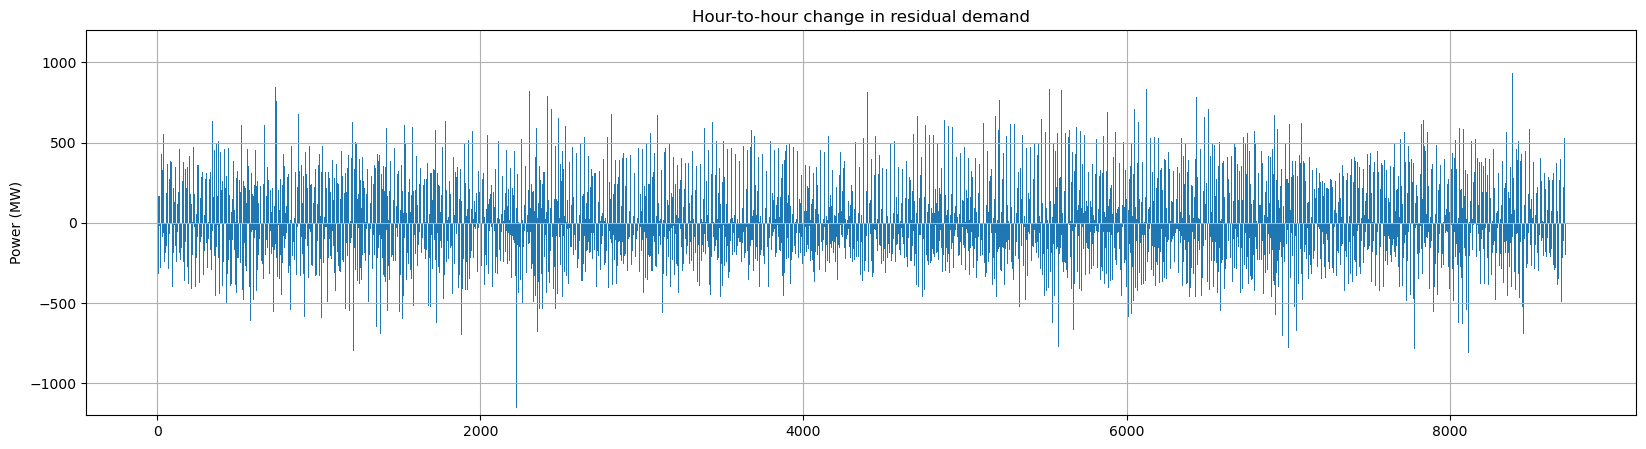

In [183]:
plt.figure(figsize=(20, 5))
plt.bar(DF['residual change'].index, DF['residual change'], width=5)
plt.grid(True)
plt.title("Hour-to-hour change in residual demand")
plt.ylabel("Power (MW)")
plt.ylim([-1200, 1200])
plt.savefig("hour-2-hour.png", format='png', facecolor='w', dpi=300, bbox_inches='tight', edgecolor='k')